In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
img_width=200
img_height=200

In [3]:
# For Training
#Now let us read metadata to get our Y values (multiple lables)
df_train = pd.read_csv('./retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv')

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_train = df_train.drop(['ID', 'Disease_Risk'], axis=1)

In [4]:
def check_disease(df):
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)    
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]
    
    return disease_name, zeroCount, oneCount

# Insert the image ID
def img_id(df,num):
    id_list = []
    for i in range(num):
        id_list.append(i+1)
    df.insert(0,'ID',id_list)

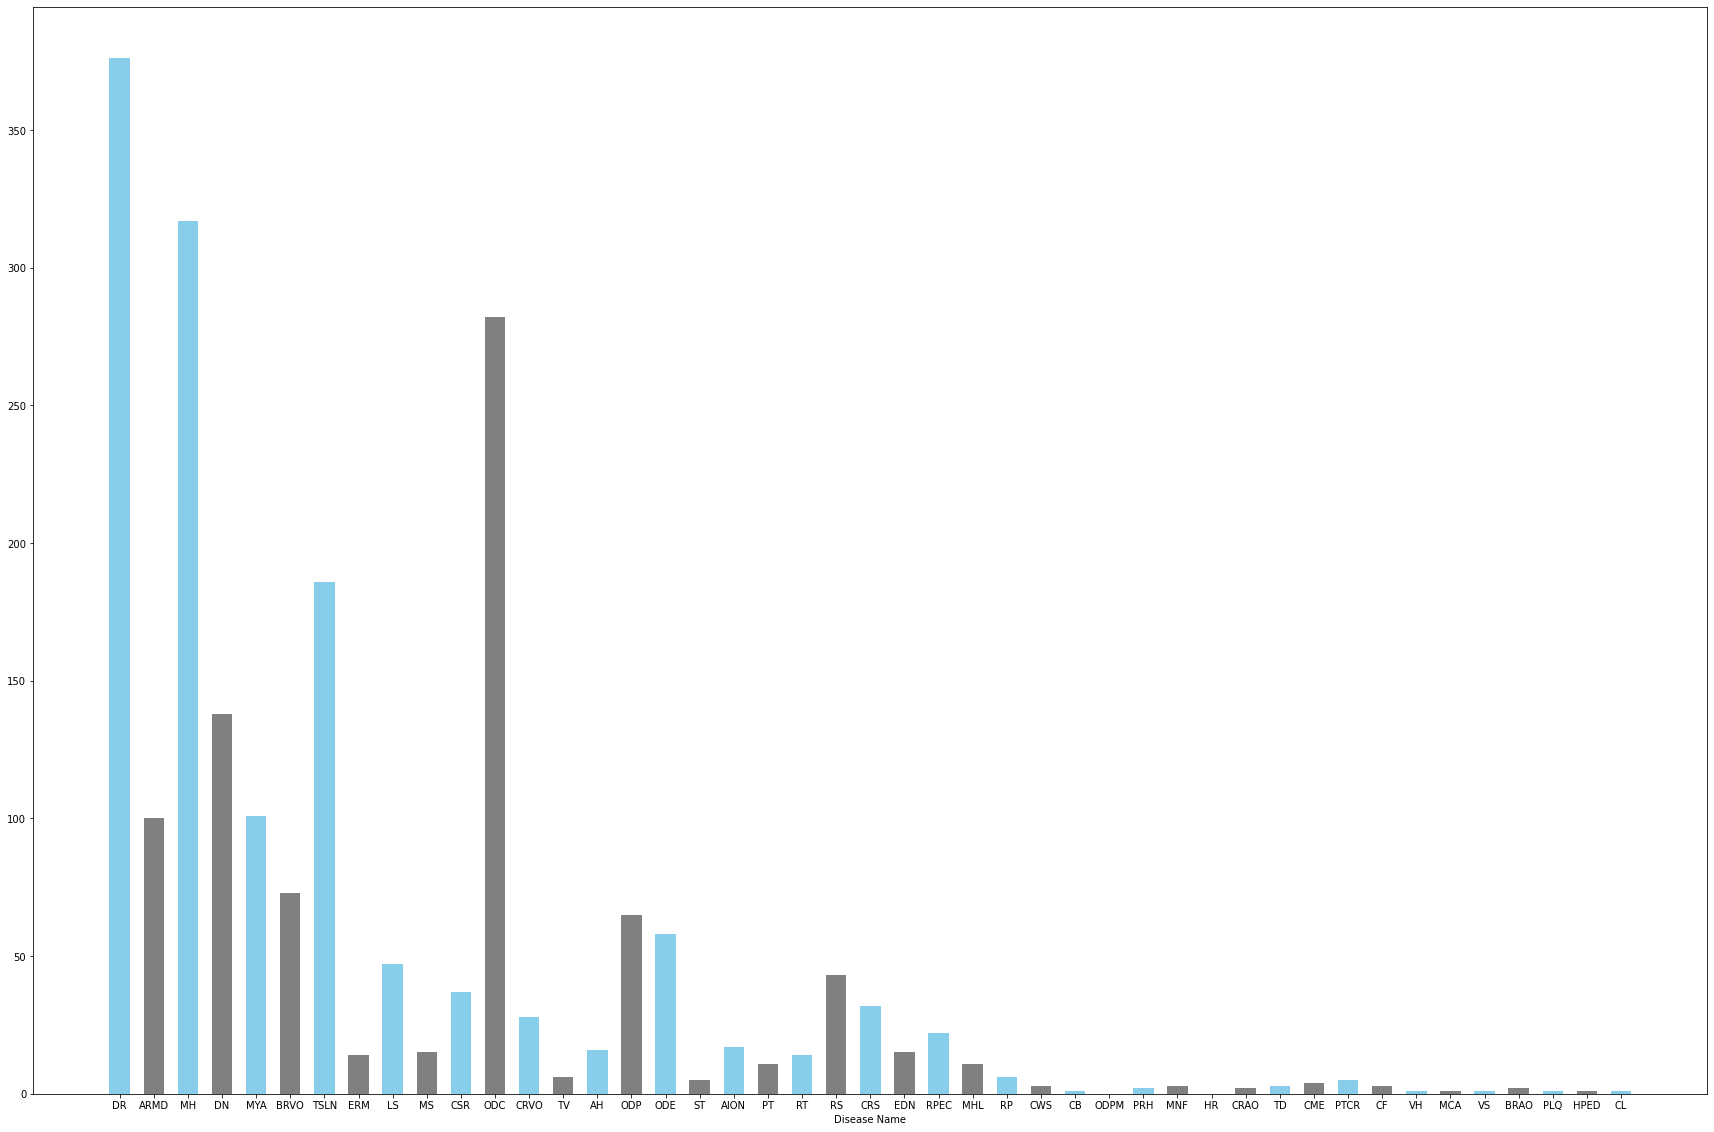

In [5]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [6]:
# Drops the columns which are below the 100
for i in range(45):
    if oneCount[i] <= 120:
        df_train = df_train.drop([disease_name[i]], axis=1)

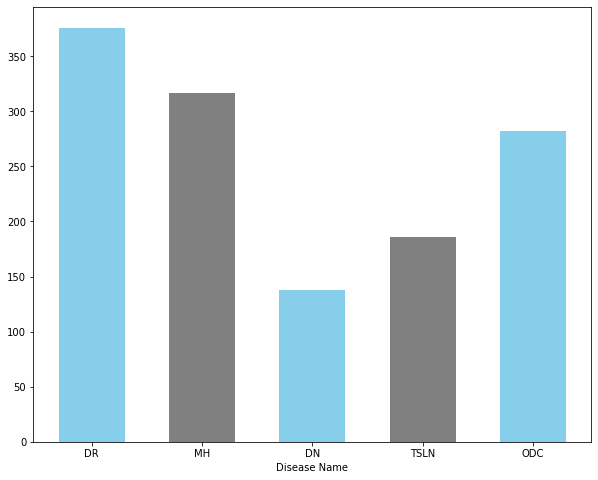

DR appear: 376
MH appear: 317
DN appear: 138
TSLN appear: 186
ODC appear: 282


In [7]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
img_id(df_train,len(df_train))

In [8]:
X_dataset = []  
print(tqdm(range(df_train.shape[0])))
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img('./retinal-disease-classification/Training_Set/Training_Set/Training/' +str(df_train['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|                                                 | 0/1920 [00:00<?, ?it/s]


  0%|                                                 | 0/1920 [00:00<?, ?it/s]


100%|██████████████████████████████████████| 1920/1920 [06:36<00:00,  4.84it/s]


In [9]:
X_train = np.array(X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_train = np.array(df_train.drop(['ID'], axis=1))

In [10]:
# For Testing
#Now let us read metadata to get our Y values (multiple lables)
df_test = pd.read_csv('./retinal-disease-classification/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')    
df_test

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)

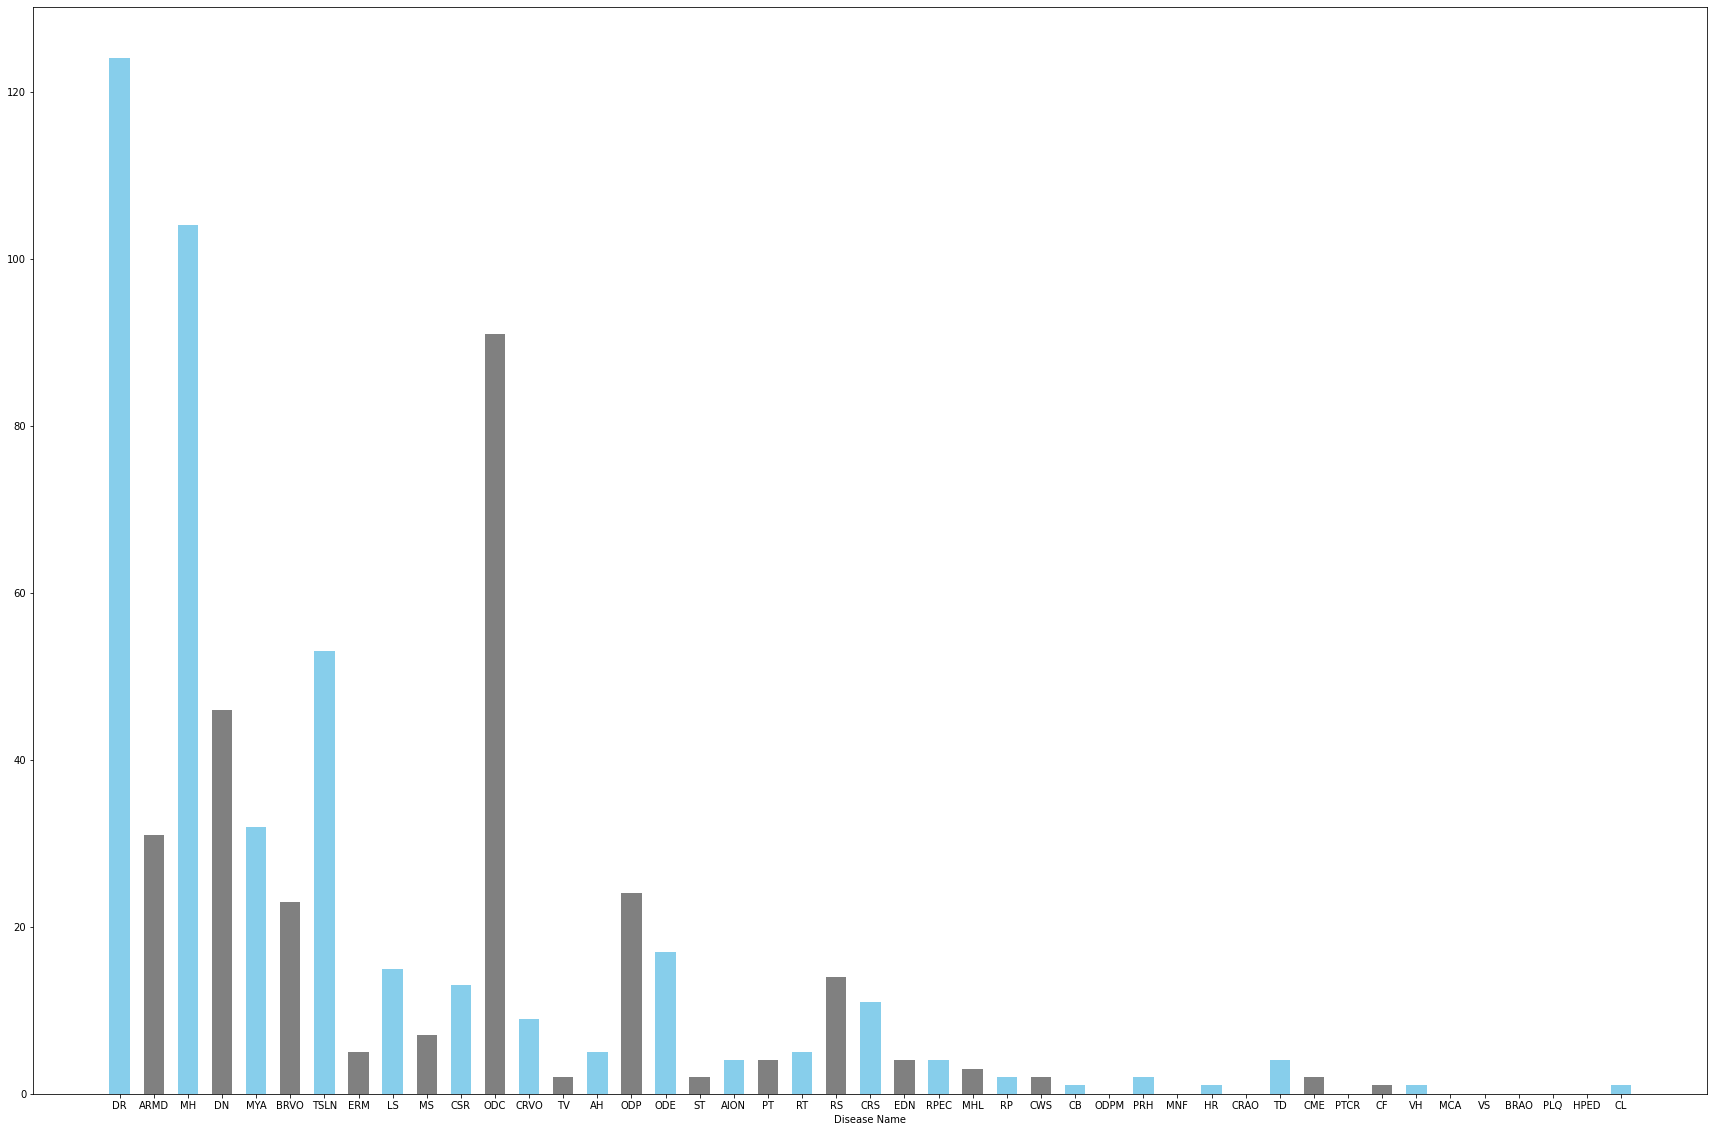

In [11]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [12]:
# Drops the columns which are below the 100
for i in range(45):
    if oneCount[i] <= 40:
        df_test = df_test.drop([disease_name[i]], axis=1)

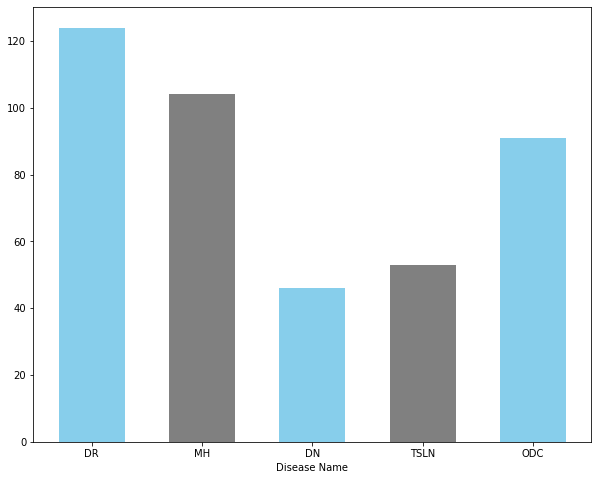

DR appear: 124
MH appear: 104
DN appear: 46
TSLN appear: 53
ODC appear: 91


In [13]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
img_id(df_test,len(df_test))

In [14]:
X_dataset = []  
print(tqdm(range(df_test.shape[0])))
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('./retinal-disease-classification/Test_Set/Test_Set/Test/' +str(df_test['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|                                                  | 0/640 [00:00<?, ?it/s]


  0%|                                                  | 0/640 [00:00<?, ?it/s]


100%|████████████████████████████████████████| 640/640 [03:10<00:00,  3.36it/s]


In [15]:
X_test = np.array(X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_test = np.array(df_test.drop(['ID'], axis=1))

In [16]:
# Deep Learning
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding="same" , activation="relu", input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat). 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        5

In [18]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
30/30 [==============================] - 899s 30s/step - loss: 0.6313 - accuracy: 0.2745 - val_loss: 0.4743 - val_accuracy: 0.7094
Epoch 2/50
30/30 [==============================] - 775s 26s/step - loss: 0.3529 - accuracy: 0.3991 - val_loss: 0.4676 - val_accuracy: 0.1562
Epoch 3/50
30/30 [==============================] - 775s 26s/step - loss: 0.3378 - accuracy: 0.4519 - val_loss: 0.5289 - val_accuracy: 0.1562
Epoch 4/50
30/30 [==============================] - 953s 32s/step - loss: 0.3302 - accuracy: 0.4534 - val_loss: 0.6306 - val_accuracy: 0.1562
Epoch 5/50
30/30 [==============================] - 833s 28s/step - loss: 0.3118 - accuracy: 0.4273 - val_loss: 0.7773 - val_accuracy: 0.1562
Epoch 6/50
30/30 [==============================] - 787s 26s/step - loss: 0.2980 - accuracy: 0.4421 - val_loss: 0.4278 - val_accuracy: 0.1562
Epoch 7/50
30/30 [==============================] - 824s 28s/step - loss: 0.2982 - accuracy: 0.4628 - val_loss: 0.5742 - val_accuracy: 0.1562
Epoch 

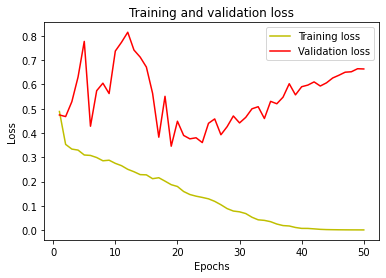

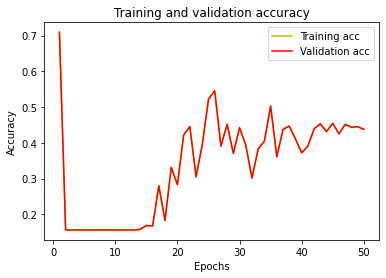

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

DR (0.993)
MH (8.29e-06)
DN (2.1e-07)
TSLN (9.53e-08)
ODC (5.43e-10)


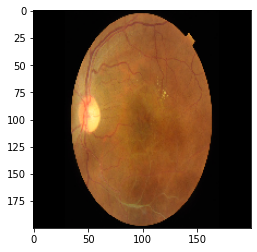

In [21]:
#Validate on an image
img = image.load_img('./retinal-disease-classification/Test_Set/Test_Set/Test/2.png', target_size=(img_width,img_height,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)
classes = np.array(disease_name)
proba = model.predict(img)  #Get probabilities for each class

sorted_categories = np.argsort(proba[0])[:-6:-1]

#Print classes and corresponding probabilities
for i in range(len(classes)):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

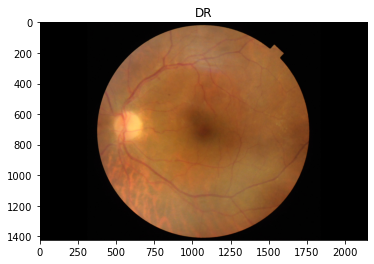

In [22]:
#Validate on an image
from keras.preprocessing import image
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# model = keras.models.load_model('driver_drowsiness_detection_model_old_dataset.h5')
# model = keras.models.load_model('eye_close_classifier.h5')

# img_width=256
# img_height=256

new_path = './retinal-disease-classification/Test_Set/Test_Set/Test/229.png'
image_result=Image.open(new_path)


def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width, img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = model.predict(img)
# print(np.argmax(result))

Categories=disease_name
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [23]:
_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")

20/20 [==============================] - 50s 2s/step - loss: 0.6638 - accuracy: 0.4375
Accuracy =  43.75 %


In [24]:
model.save('multi_CNN_200x200_50epoch.h5')

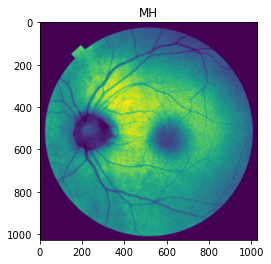

In [25]:
# predict for my data
new_path = './test_for_model/focal_mirror.jpg'
image_result=Image.open(new_path)


def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width, img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = model.predict(img)
# print(np.argmax(result))

Categories=disease_name
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

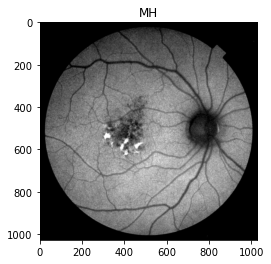

In [26]:
new_path = './test_for_model/speckled.jpg'
image_result=Image.open(new_path)


def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width, img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = model.predict(img)
# print(np.argmax(result))

Categories=disease_name
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()